Obiettivo: Creare un modello di Machine Learning per classificare le cifre da 0 a 9 utilizzando il
dataset MNIST Digits.

Punti dell'esercizio

Importazione dei Dati
Carica il dataset MNIST Digits utilizzando sklearn.datasets.
Visualizza alcune cifre per comprendere i dati.
Preprocessing dei Dati
Normalizza i dati dividendo i valori dei pixel per il massimo valore possibile (16).
Dividi il dataset in un training set e un test set usando train_test_split.
Scelta del Modello
Scegli un algoritmo di classificazione, come Support Vector Machine (SVM) o Random Forest.
Configura il modello con parametri di base.
Addestramento del Modello
Addestra il modello sui dati di training.
Verifica che il processo termini senza errori.
Valutazione del Modello
Utilizza il test set per valutare il modello.
Calcola l'accuratezza e stampa un report di classificazione.
Visualizzazione dei Risultati
Mostra alcune immagini del test set con le loro predizioni e i valori reali.
Identifica eventuali errori di classificazione.
Esperimenti Extra (Facoltativo)
Cambia il modello con un altro algoritmo (es. k-Nearest Neighbors o Decision Tree).
Applica la cross-validation per migliorare la stabilità delle valutazioni.
Genera una matrice di confusione per analizzare gli errori.

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

In [82]:
data = load_digits()
X = data.data
y = data.target

In [83]:
X, y = load_digits(return_X_y= True, as_frame = True)

In [84]:
X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [85]:
y.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [86]:
digits = load_digits()
print(digits["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [87]:
X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [114]:
X_normalizzata = X / 16

In [116]:
scaler = MinMaxScaler()
X_normalizzata = scaler.fit_transform(X)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1437, 64)
X_test shape: (360, 64)
y_train shape: (1437,)
y_test shape: (360,)


In [90]:
model = RandomForestClassifier(random_state=42)

In [91]:
param_grid = {
    "n_estimators": [100, 150, 200],
    "max_depth": [None, 10, 20, 30],

}

In [92]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)

In [93]:
GridSearch = GridSearchCV(model, param_grid = param_grid, cv = kfold, scoring = "accuracy")

In [94]:
GS = GridSearch.fit(X_train, y_train)

In [95]:
print(GridSearch.best_params_)

{'max_depth': None, 'n_estimators': 150}


In [96]:
OptModel = model.set_params(**GridSearch.best_params_)

In [102]:
OptModel.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [103]:
y_pred = OptModel.predict(X_test)

In [104]:
print("y_pred length:", len(y_pred))

y_pred length: 360


In [106]:
target_names = [str(i) for i in range(10)]
target_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [107]:
class_report = classification_report(y_test, y_pred, target_names=target_names)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.93      0.95        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



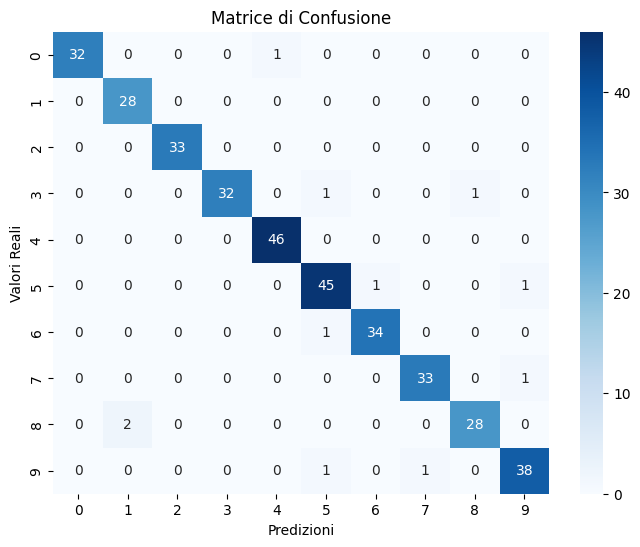

In [109]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.title("Matrice di Confusione")
plt.xlabel("Predizioni")
plt.ylabel("Valori Reali")
plt.show()

In [110]:
correct_predictions = np.diagonal(cm)
errors = cm.sum(axis=1) - correct_predictions

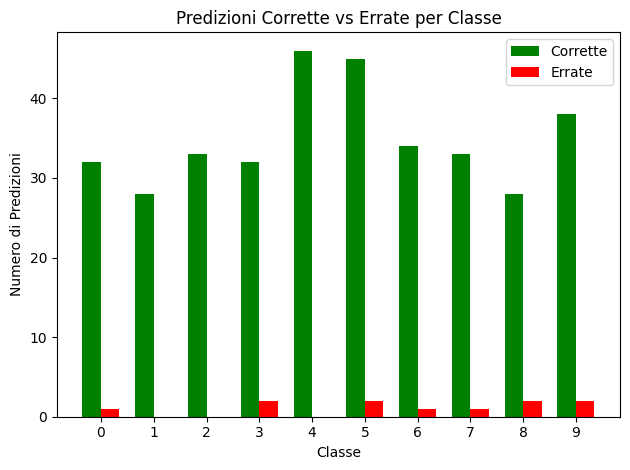

In [113]:
bar_width = 0.35
index = np.arange(len(classes))

plt.bar(index, correct_predictions, bar_width, label='Corrette', color='green')
plt.bar(index + bar_width, errors, bar_width, label='Errate', color='red')
plt.xlabel('Classe')
plt.ylabel('Numero di Predizioni')
plt.title('Predizioni Corrette vs Errate per Classe')
plt.xticks(index + bar_width / 2, classes)
plt.legend()

plt.tight_layout()
plt.show()